## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [2]:
import json

with open('data/hw4_data.json', 'r') as f:
    data = json.load(f)

# 创建用户字典，包含用户和影响力分数
users = {user[0]: user[1] for user in data['nodes']}

# 创建一个字典来表示社交关系（邻接表）
network = {}

# 初始化网络字典
for user in users:
    network[user] = {}

# 填充边关系
for edge in data['edges']:
    user1, user2, weight = edge
    network[user1][user2] = weight
    network[user2][user1] = weight  # 假设关系是双向的

# 输出网络（可以用于调试）
for user, friends in network.items():
    print(f"{user}: {friends}")


Yanyan-Wang: {'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}
Aarebecca: {'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7.73, 'lidongze0629': 6.58, 'tyn1998': 6.4, 'RackweLLizm': 4.84, 'yikenie': 4.55, 'yubo0923': 3.82, 'Maple0817': 3.27, 'frank-zsy': 0.97}
pomelo-nwu: {'Yanyan-Wang': 25.09, 'Aarebecca': 24.84, 'yangzy0603': 13.85, 'tyn1998': 12.48, 'lidongze0629': 8.1, 'yvonneyx': 7.63, 'RackweLLizm': 4.97, 'yikenie': 4.66, 'bifenglin': 4.11, 'frank-zsy': 3.96, 'yubo0923': 3.9, 'wj23027': 3.86, 'andyhuang18': 3.56, 'Maple0817': 3.32, 'will-ww': 3.27, 'zhicheng-ning': 2.52, 'PureNatural': 2.36, 'xiaoya-yaya': 2.24, 'xgdyp': 2.1, 'longyanz': 2.1, 'Zzzzzhuzhiwei': 1.5, 'birdflyi': 1.33, 'lhbvvvvv': 1.09, 'zhaosj975': 1}
tyn1998: {'andyhuang18':

In [3]:
# 输出每个用户的直接朋友列表
for user, friends in network.items():
    print(f"{user} 的直接朋友: {list(friends.keys())}")

Yanyan-Wang 的直接朋友: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca 的直接朋友: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu 的直接朋友: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
tyn1998 的直接朋友: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629', 'yvo

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

In [4]:
# 计算每个用户的度数
degree = {user: len(friends) for user, friends in network.items()}

# 按照度数从大到小排序，并输出前5个用户及其朋友数量
sorted_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)
print("度数最多的前5个用户及其朋友数量:")
for user, deg in sorted_degree[:5]:
    print(f"{user}: {deg}个朋友")


度数最多的前5个用户及其朋友数量:
tyn1998: 30个朋友
frank-zsy: 30个朋友
pomelo-nwu: 24个朋友
andyhuang18: 23个朋友
wj23027: 23个朋友


In [5]:
# 按照影响力分数从大到小排序，并输出前5个用户
sorted_influence = sorted(users.items(), key=lambda x: x[1], reverse=True)
print("影响力最高的前5个用户:")
for user, influence in sorted_influence[:5]:
    print(f"{user}: {influence} 影响力")


影响力最高的前5个用户:
Yanyan-Wang: 50.95 影响力
Aarebecca: 23.82 影响力
pomelo-nwu: 22.36 影响力
tyn1998: 16.64 影响力
frank-zsy: 15.8 影响力


In [6]:
# 综合考虑影响力分数和度数
weighted_influence = {}
for user in users:
    degree_score = degree.get(user, 0)
    influence_score = users[user]
    weighted_influence[user] = 0.5 * influence_score + 0.5 * degree_score

# 按照加权得分排序并输出前5个用户
sorted_weighted_influence = sorted(weighted_influence.items(), key=lambda x: x[1], reverse=True)
print("综合考虑影响力分数和朋友数量，最有影响力的前5个用户:")
for user, score in sorted_weighted_influence[:5]:
    print(f"{user}: {score}")


综合考虑影响力分数和朋友数量，最有影响力的前5个用户:
Yanyan-Wang: 32.475
tyn1998: 23.32
pomelo-nwu: 23.18
frank-zsy: 22.9
Aarebecca: 17.41


#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 

In [7]:
# 找到 Yanyan-Wang 的朋友
yanyan_friends = network['Yanyan-Wang']

# 找到 Yanyan-Wang 的朋友的朋友
friends_of_friends = {}
for friend in yanyan_friends:
    for fof, _ in network[friend].items():
        if fof != 'Yanyan-Wang' and fof not in yanyan_friends:
            if fof in friends_of_friends:
                friends_of_friends[fof] += 1
            else:
                friends_of_friends[fof] = 1

# 按照共同朋友数量排序，找出推荐的朋友
sorted_friends_of_friends = sorted(friends_of_friends.items(), key=lambda x: x[1], reverse=True)
print("Yanyan-Wang 推荐的新朋友:")
for user, common_friends in sorted_friends_of_friends[:5]:
    print(f"{user}: 共同朋友数 = {common_friends}")


Yanyan-Wang 推荐的新朋友:
will-ww: 共同朋友数 = 6
zhicheng-ning: 共同朋友数 = 6
PureNatural: 共同朋友数 = 6
xiaoya-yaya: 共同朋友数 = 6
xgdyp: 共同朋友数 = 6


In [8]:
# 找到与 Yanyan-Wang 连接强度最高的5个用户
connection_strength = {}
for user in users:
    if user != 'Yanyan-Wang':
        strength = network['Yanyan-Wang'].get(user, 0)
        if strength > 0:
            connection_strength[user] = strength

# 按照连接强度排序
sorted_connection_strength = sorted(connection_strength.items(), key=lambda x: x[1], reverse=True)
print("与 Yanyan-Wang 连接强度最高的5个用户:")
for user, strength in sorted_connection_strength[:5]:
    print(f"{user}: 连接强度 = {strength}")


与 Yanyan-Wang 连接强度最高的5个用户:
Aarebecca: 连接强度 = 25.3
pomelo-nwu: 连接强度 = 25.09
yangzy0603: 连接强度 = 11.85
tyn1998: 连接强度 = 9.62
yvonneyx: 连接强度 = 7.39


#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

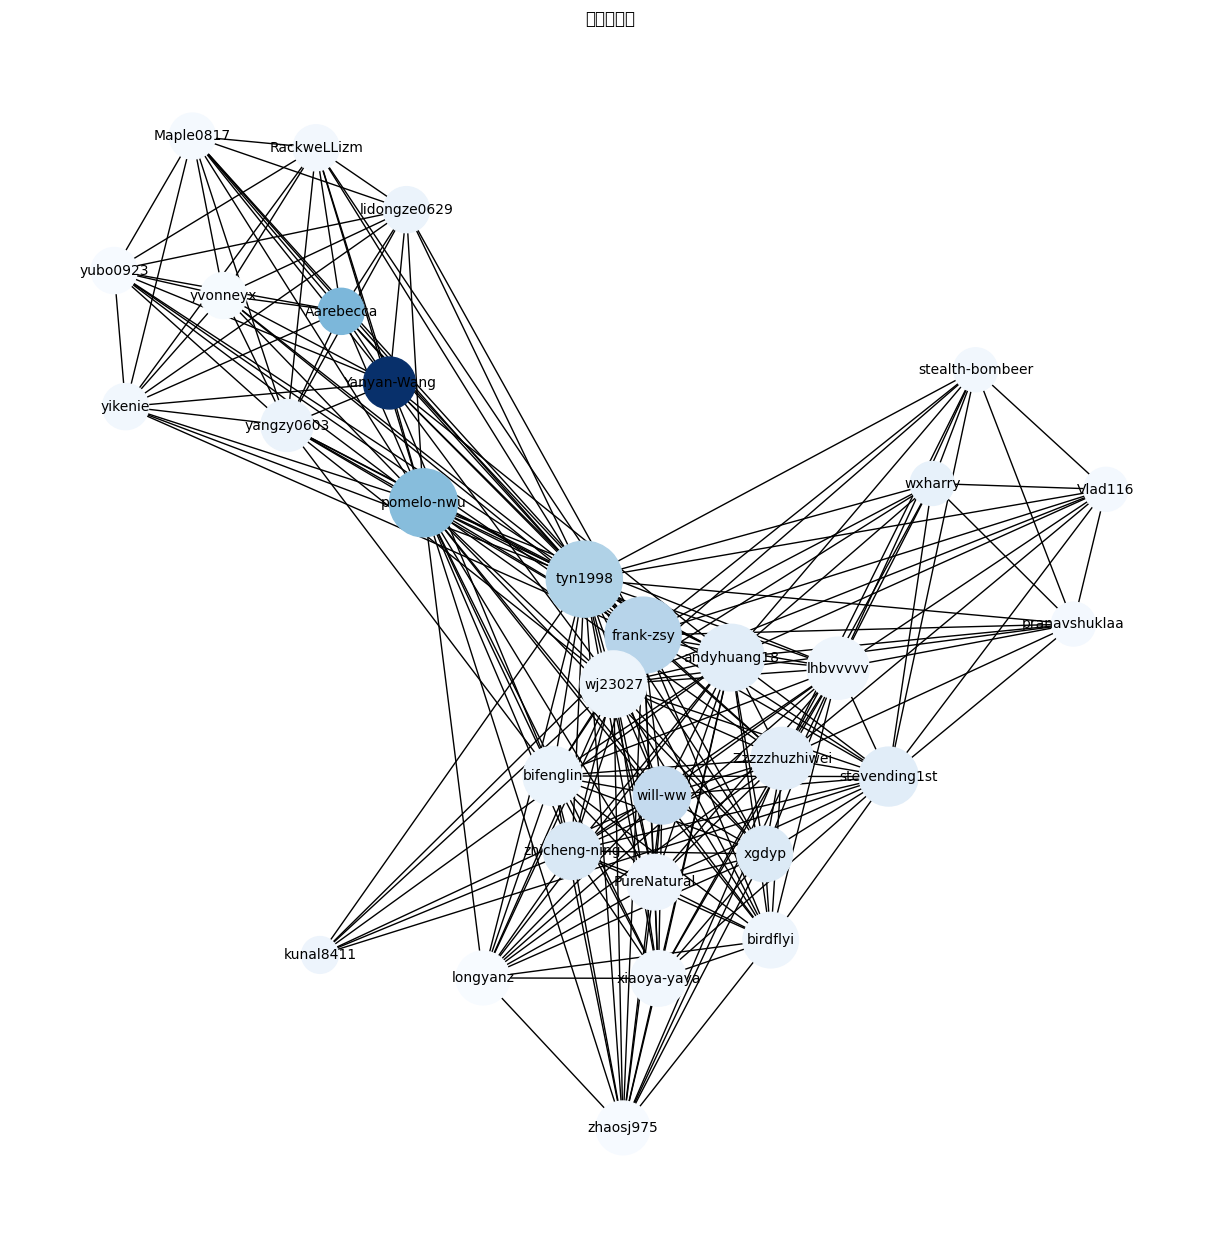

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个无向图
G = nx.Graph()

# 添加节点和边
for user in users:
    G.add_node(user, size=degree.get(user, 0), influence=users[user])

for edge in data['edges']:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)

# 绘制图形
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # 布局方式
node_sizes = [G.nodes[node]['size'] * 100 for node in G.nodes()]  # 根据度数设置节点大小
node_colors = [G.nodes[node]['influence'] for node in G.nodes()]  # 根据影响力设置节点颜色

nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues, font_size=10)
plt.title("社交网络图")
plt.show()
